# Инициализация проекта

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import random
from datetime import datetime, date, time

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
data= pd.read_csv('Dataset2.csv')

Получим сведения о столбцах :

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

<font size=4>Столбцы с неподходящими типами данных:

- изменение типа данных столбца 'Movie Time' с object на int;
- изменение типа данных столбца 'IMDB Votes' с object на тип float.
- изменение типа данных столбца 'Original Release Date' с object на тип дата.
- изменение типа данных столбца 'Streaming Release Date' с object на тип дата.
- изменение типа данных столбца 'Tomatometer Rating' с float на int;
- изменение типа данных столбца 'Tomatometer Rating' с float на тип int.
- изменение типа данных столбца 'Audience Rating' с float на int;
- изменение типа данных столбца 'Audience Count' с float на тип int.
- изменение типа данных столбца 'Tomatometer Top Critics Count' с float на int;
- изменение типа данных столбца 'Tomatometer Fresh Critics Count' с float на тип int.
- изменение типа данных столбца 'Tomatometer Rotten Critics Count' с float на тип int.
    
</font>

In [6]:
data.describe()

Unnamed: 0  Year of Release  Movie Time  IMDB Rating  \
count  571.000000       571.000000  571.000000   571.000000   
mean   285.000000      1973.357268  124.894921     7.570403   
std    164.977776        29.315738   26.322817     0.559652   
min      0.000000      1927.000000   66.000000     5.600000   
25%    142.500000      1944.000000  107.000000     7.300000   
50%    285.000000      1972.000000  121.000000     7.600000   
75%    427.500000      2001.000000  136.500000     7.900000   
max    570.000000      2021.000000  238.000000     9.300000   

       Tomatometer Rating  Tomatometer Count  Audience Rating  Audience Count  \
count          439.000000         439.000000       439.000000    4.390000e+02   
mean            87.503417         110.697039        82.428246    5.154145e+05   
std             11.690622         119.541406        10.927897    3.623107e+06   
min             29.000000           5.000000        21.000000    6.000000e+00   
25%             84.000000          25.000000        78.000000    6.637500e+03   
50%             91.000000          54.000000        85.000000    3.716600e+04   
75%             95.000000         199.000000        90.000000    1.255365e+05   
max            100.000000         574.000000        98.000000    3.579764e+07   

       Tomatometer Top Critics Count  Tomatometer Fresh Critics Count  \
count                     439.000000                       439.000000   
mean                       21.861048                        98.471526   
std                        21.615492                       107.798554   
min                         0.000000                         3.000000   
25%                         5.000000                        21.500000   
50%                        11.000000                        49.000000   
75%                        45.000000                       163.500000   
max                        69.000000                       495.000000   

       Tomatometer Rotten Critics Count  
count                        439.000000  
mean                          12.275626  
std                           19.310232  
min                            0.000000  
25%                            2.000000  
50%                            5.000000  
75%                           15.000000  
max                          182.000000

Уберем дубликаты:

In [7]:
data.duplicated().sum()

0

Удалим ненужный столбец:

In [8]:
del data["Unnamed: 0"]

## Обработка пропущенных значений

In [9]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Critic Consensus                    40.630473
Audience Status                     23.642732
Authors                             23.467601
Directors                           23.467601
Streaming Release Date              23.292469
Movie Info                          23.292469
Audience Rating                     23.117338
Audience Count                      23.117338
Tomatometer Count                   23.117338
Tomatometer Status                  23.117338
Genres                              23.117338
Tomatometer Top Critics Count       23.117338
Content Rating                      23.117338
Tomatometer Fresh Critics Count     23.117338
Tomatometer Rating                  23.117338
Actors                              23.117338
Original Release Date               23.117338
Tomatometer Rotten Critics Count    23.117338
Production Company                  23.117338
Film                                 0.000000
Oscar Year                           0.000000
IMDB Votes                        

Заполним столбцы,которые не можем заполнить предположительно, значением unknown:

In [10]:
data_column_unknown=['Movie Info','Genres','Critic Consensus','Actors']
for col in data_column_unknown:
    data[col]=data[col].fillna('unknown')
data.isna().sum()

Film                                  0
Oscar Year                            0
Film Studio/Producer(s)               0
Award                                 0
Year of Release                       0
Movie Time                            0
Movie Genre                           0
IMDB Rating                           0
IMDB Votes                            0
Movie Info                            0
Genres                                0
Critic Consensus                      0
Content Rating                      132
Directors                           134
Authors                             134
Actors                                0
Original Release Date               132
Streaming Release Date              133
Production Company                  132
Tomatometer Status                  132
Tomatometer Rating                  132
Tomatometer Count                   132
Audience Status                     135
Audience Rating                     132
Audience Count                      132


Переведем дату в определенный формат:

In [11]:
data ['Original Release Date'] = pd.to_datetime(data['Original Release Date'],format = '%Y-%m-%d')
data ['Streaming Release Date'] = pd.to_datetime(data['Streaming Release Date'],format = '%Y-%m-%d')

<font size=4><b>Предположения для заполнения пропущенного значения:</b>

Заполним дату релиза началом года.

In [12]:
f = lambda x : str(x)+"-01-01"
data['Original Release Date'] = data['Original Release Date'].fillna(data['Year of Release'].transform(f))
data.head(10)

Film Oscar Year Film Studio/Producer(s)    Award  \
0                           Wings    1927/28    Famous Players-Lasky   Winner   
1                      7th Heaven    1927/28                     Fox  Nominee   
2                      The Racket    1927/28       The Caddo Company  Nominee   
3             The Broadway Melody    1928/29     Metro-Goldwyn-Mayer   Winner   
4                           Alibi    1928/29     Feature Productions  Nominee   
5                 Hollywood Revue    1928/29     Metro-Goldwyn-Mayer  Nominee   
6                  In Old Arizona    1928/29                     Fox  Nominee   
7                     The Patriot    1928/29  Paramount Famous Lasky  Nominee   
8  All Quiet on the Western Front    1929/30               Universal   Winner   
9                   The Big House    1929/30            Cosmopolitan  Nominee   

   Year of Release  Movie Time             Movie Genre  IMDB Rating  \
0             1927         144       Drama,Romance,War          7.5   
1             1927         110           Drama,Romance          7.7   
2             1928          84   Crime,Drama,Film-Noir          6.7   
3             1929         100   Drama,Musical,Romance          5.7   
4             1929          91    Action,Crime,Romance          5.8   
5             1929         130            Comedy,Music          5.7   
6             1928          95                 Western          5.6   
7             1928         113  Drama,History,Thriller          7.4   
8             1930         152               Drama,War          8.1   
9             1930          87    Crime,Drama,Thriller          7.1   

  IMDB Votes                                         Movie Info  \
0     12,221  With World War I afoot, David Armstrong (Richa...   
1      3,439                                            unknown   
2      1,257                                            unknown   
3      6,890  Vaudeville sisters "Hank" (Bessie Love) and Qu...   
4        765                                            unknown   
5      2,004                                            unknown   
6      1,019  In this early Western, notorious bandit the Ci...   
7         18                                            unknown   
8     59,214                                            unknown   
9      2,079  After being convicted of manslaughter, drunk d...   

                                           Genres  \
0                    Action & Adventure, Classics   
1                                         unknown   
2                                         unknown   
3              Musical & Performing Arts, Romance   
4                                         unknown   
5                                         unknown   
6  Action & Adventure, Classics, Western, Romance   
7                                         unknown   
8                                         unknown   
9                                 Classics, Drama   

                                    Critic Consensus Content Rating  \
0  Subsequent war epics may have borrowed heavily...          PG-13   
1                                            unknown            NaN   
2                                            unknown            NaN   
3  The Broadway Melody is interesting as an examp...             NR   
4                                            unknown            NaN   
5                                            unknown            NaN   
6                                            unknown             NR   
7                                            unknown            NaN   
8                                            unknown            NaN   
9                                            unknown             NR   

                      Directors  \
0               William Wellman   
1                           NaN   
2                           NaN   
3                Harry Beaumont   
4                           NaN   
5                           NaN   
6  Irv

Заполним некоторые признаки по моде :

In [13]:
f = lambda x: x.mode().iat[0] if x.notna().any() else 'unknown' 

fill_director = data.groupby('Film Studio/Producer(s)')['Directors'].transform(f)
data['Directors'] = data['Directors'].fillna(fill_director)

fill_author = data.groupby('Film Studio/Producer(s)')['Authors'].transform(f)
data['Authors'] = data['Authors'].fillna(fill_author)

fill_company = data.groupby('Directors')['Production Company'].transform(f)
data['Production Company'] = data['Production Company'].fillna(fill_company)

fill_status = data.groupby('Directors')['Tomatometer Status'].transform(f)
data['Tomatometer Status'] = data['Tomatometer Status'].fillna(fill_status)

fill_aud = data.groupby('Directors')['Audience Status'].transform(f)
data['Audience Status'] = data['Audience Status'].fillna(fill_aud)

content = lambda x: x.mode().iat[0] if x.notna().any() else 'NR'

content_data = data.groupby('Directors')['Content Rating'].transform(content)
data['Content Rating'] = data['Content Rating'].fillna(content_data)

netflix = date(2007, 1, 1)
g = lambda x: x if (x > pd.Timestamp(netflix)) else netflix

data['Streaming Release Date'] = data['Streaming Release Date'].fillna(data['Original Release Date'].transform(g))

votes = lambda x: int(str(x).replace(',',''))

data['IMDB Votes'] = data['IMDB Votes'].transform(votes).astype(int)
data.head(20)


Film Oscar Year     Film Studio/Producer(s)  \
0                            Wings    1927/28        Famous Players-Lasky   
1                       7th Heaven    1927/28                         Fox   
2                       The Racket    1927/28           The Caddo Company   
3              The Broadway Melody    1928/29         Metro-Goldwyn-Mayer   
4                            Alibi    1928/29         Feature Productions   
5                  Hollywood Revue    1928/29         Metro-Goldwyn-Mayer   
6                   In Old Arizona    1928/29                         Fox   
7                      The Patriot    1928/29      Paramount Famous Lasky   
8   All Quiet on the Western Front    1929/30                   Universal   
9                    The Big House    1929/30                Cosmopolitan   
10                        Disraeli    1929/30                Warner Bros.   
11                    The Divorcee    1929/30         Metro-Goldwyn-Mayer   
12                 The Love Parade    1929/30      Paramount Famous Lasky   
13                        Cimarron    1930/31                   RKO Radio   
14                      East Lynne    1930/31                         Fox   
15                  The Front Page    1930/31           The Caddo Company   
16                          Skippy    1930/31            Paramount Publix   
17                     Trader Horn    1930/31         Metro-Goldwyn-Mayer   
18                     Grand Hotel    1931/32         Metro-Goldwyn-Mayer   
19                      Arrowsmith    1931/32  Samuel Goldwyn Productions   

      Award  Year of Release  Movie Time              Movie Genre  \
0    Winner             1927         144        Drama,Romance,War   
1   Nominee             1927         110            Drama,Romance   
2   Nominee             1928          84    Crime,Drama,Film-Noir   
3    Winner             1929         100    Drama,Musical,Romance   
4   Nominee             1929          91     Action,Crime,Romance   
5   Nominee             1929         130             Comedy,Music   
6   Nominee             1928          95                  Western   
7   Nominee             1928         113   Drama,History,Thriller   
8    Winner             1930         152                Drama,War   
9   Nominee             1930          87     Crime,Drama,Thriller   
10  Nominee             1929          90  Biography,Drama,History   
11  Nominee             1930          84            Romance,Drama   
12  Nominee             1929         107   Comedy,Musical,Romance   
13   Winner             1931         123            Drama,Western   
14  Nominee             1931         102            Drama,Romance   
15  Nominee             1931         101       Comedy,Crime,Drama   
16  Nominee             1931          85      Comedy,Drama,Family   
17  Nominee             1931         122   Action,Adventure,Drama   
18   Winner             1932         112            Drama,Romance   
19  Nominee             1931         108                    Drama   

    IMDB Rating  IMDB Votes  \
0           7.5       12221   
1           7.7        3439   
2           6.7        1257   
3           5.7        6890   
4           5.8         765   
5           5.7        2004   
6           5.6        1019   
7           7.4          18   
8           8.1       59214   
9           7.1        2079   
10          6.2        1143   
11          6.7        2982   
12          7.0        2163   
13          5.9        5851   
14          5.9         188   
15          6.8        2741   
16          6.3         772   
17          6.3         957   
18          7.4       18314   
19          6.2        1663   

                                           Movie Info  \
0   With World War I afoot, David Armstrong (Richa...   
1                                             unknown   
2                                             unknown   
3   Vaudeville sisters "Hank" (Bessie Love) and Qu...   
4                        

In [14]:
data.isna().sum()

Film                                  0
Oscar Year                            0
Film Studio/Producer(s)               0
Award                                 0
Year of Release                       0
Movie Time                            0
Movie Genre                           0
IMDB Rating                           0
IMDB Votes                            0
Movie Info                            0
Genres                                0
Critic Consensus                      0
Content Rating                        0
Directors                             0
Authors                               0
Actors                                0
Original Release Date                 0
Streaming Release Date                0
Production Company                    0
Tomatometer Status                    0
Tomatometer Rating                  132
Tomatometer Count                   132
Audience Status                       0
Audience Rating                     132
Audience Count                      132


## Корреляция данных

Поработаем с выбросами:

In [15]:
data.describe()[['IMDB Rating','Tomatometer Rating','Audience Rating']]

IMDB Rating  Tomatometer Rating  Audience Rating
count   571.000000          439.000000       439.000000
mean      7.570403           87.503417        82.428246
std       0.559652           11.690622        10.927897
min       5.600000           29.000000        21.000000
25%       7.300000           84.000000        78.000000
50%       7.600000           91.000000        85.000000
75%       7.900000           95.000000        90.000000
max       9.300000          100.000000        98.000000

In [16]:
data_notna = data.dropna()
tmp = data_notna[['IMDB Rating','Tomatometer Rating','Audience Rating']]
tmp

IMDB Rating  Tomatometer Rating  Audience Rating
0            7.5                93.0             78.0
3            5.7                33.0             21.0
6            5.6                56.0             38.0
9            7.1                75.0             69.0
13           5.9                50.0             25.0
18           7.4                86.0             77.0
21           7.3                90.0             74.0
26           5.9                59.0             26.0
27           7.4                96.0             74.0
28           6.5                93.0             53.0
31           7.2                94.0             78.0
32           7.1               100.0             74.0
33           6.4                91.0             53.0
36           8.1                98.0             93.0
37           7.0                78.0             69.0
40           7.5                93.0             82.0
43           7.5                92.0             85.0
45           8.0                97.0             93.0
48           7.7                93.0             83.0
49           6.9                94.0             71.0
51           7.7               100.0             89.0
53           7.4                94.0             77.0
55           6.9                91.0             62.0
59           7.8               100.0             91.0
60           6.7                62.0             50.0
62           7.8                90.0             86.0
63           7.9                86.0             88.0
64           7.9                90.0             86.0
65           6.5                78.0             50.0
66           7.2               100.0             70.0
68           7.8                92.0             84.0
69           6.7                86.0             50.0
70           7.2                82.0             73.0
71           7.7                93.0             87.0
72           8.0                94.0             89.0
73           7.3                91.0             76.0
74           7.5                95.0             76.0
76           7.7                93.0             83.0
78           7.8                96.0             87.0
79           7.3               100.0             78.0
81           7.9               100.0             89.0
82           6.9                80.0             46.0
83           7.3                90.0             81.0
84           7.1                89.0             72.0
91           7.5                88.0             81.0
92           7.9                82.0             87.0
93           7.3                86.0             71.0
94           8.1                96.0             94.0
95           7.9                97.0             89.0
96           7.9               100.0             85.0
97           7.9               100.0             86.0
98           8.0                98.0             89.0
99           7.6                96.0             85.0
101          7.5                83.0             85.0
102          7.5                95.0             81.0
103          8.1               100.0             88.0
104          8.4                93.0             95.0
105          6.9                80.0             72.0
106          7.6               100.0             82.0
108          6.6                86.0             46.0
109          7.9               100.0             93.0
110          7.7                89.0             81.0
111          6.9                33.0             72.0
112          8.3               100.0             90.0
113          7.6               100.0             83.0
115          8.0               100.0             88.0
116          8.0               100.0             91.0
118          7.7                86.0             87.0
119          7.4                97.0             78.0
120          7.6                93.0             85.0
122          7.5               100.0             76.0
123          7.7                89.0             85.0
125          7.7                93.0             89.0
126      

In [17]:
Q1 = tmp.quantile(0.25)
Q1

IMDB Rating            7.3
Tomatometer Rating    84.0
Audience Rating       78.0
Name: 0.25, dtype: float64

In [18]:
Q3 = tmp.quantile(0.75)
Q3

IMDB Rating            8.0
Tomatometer Rating    95.0
Audience Rating       90.0
Name: 0.75, dtype: float64

Фильтруем данные без выбросов в датасет:

In [19]:
IQR = Q3-Q1

data_filter = tmp[~((tmp < (Q1 - 1.5 * IQR)) |(tmp >(Q3 + 1.5 * IQR))).any(axis=1)]
data_filter

IMDB Rating  Tomatometer Rating  Audience Rating
0            7.5                93.0             78.0
9            7.1                75.0             69.0
18           7.4                86.0             77.0
21           7.3                90.0             74.0
27           7.4                96.0             74.0
31           7.2                94.0             78.0
32           7.1               100.0             74.0
36           8.1                98.0             93.0
37           7.0                78.0             69.0
40           7.5                93.0             82.0
43           7.5                92.0             85.0
45           8.0                97.0             93.0
48           7.7                93.0             83.0
49           6.9                94.0             71.0
51           7.7               100.0             89.0
53           7.4                94.0             77.0
55           6.9                91.0             62.0
59           7.8               100.0             91.0
62           7.8                90.0             86.0
63           7.9                86.0             88.0
64           7.9                90.0             86.0
66           7.2               100.0             70.0
68           7.8                92.0             84.0
70           7.2                82.0             73.0
71           7.7                93.0             87.0
72           8.0                94.0             89.0
73           7.3                91.0             76.0
74           7.5                95.0             76.0
76           7.7                93.0             83.0
78           7.8                96.0             87.0
79           7.3               100.0             78.0
81           7.9               100.0             89.0
83           7.3                90.0             81.0
84           7.1                89.0             72.0
91           7.5                88.0             81.0
92           7.9                82.0             87.0
93           7.3                86.0             71.0
94           8.1                96.0             94.0
95           7.9                97.0             89.0
96           7.9               100.0             85.0
97           7.9               100.0             86.0
98           8.0                98.0             89.0
99           7.6                96.0             85.0
101          7.5                83.0             85.0
102          7.5                95.0             81.0
103          8.1               100.0             88.0
104          8.4                93.0             95.0
105          6.9                80.0             72.0
106          7.6               100.0             82.0
109          7.9               100.0             93.0
110          7.7                89.0             81.0
112          8.3               100.0             90.0
113          7.6               100.0             83.0
115          8.0               100.0             88.0
116          8.0               100.0             91.0
118          7.7                86.0             87.0
119          7.4                97.0             78.0
120          7.6                93.0             85.0
122          7.5               100.0             76.0
123          7.7                89.0             85.0
125          7.7                93.0             89.0
126          8.0                90.0             88.0
127          7.5                94.0             84.0
129          7.7                90.0             83.0
130          8.5                99.0             95.0
131          6.9                71.0             69.0
132          7.4                85.0             75.0
133          7.0                80.0             68.0
134          7.2                89.0             76.0
135          7.2                86.0             67.0
136          7.7                94.0             82.0
138          7.6                87.0             80.0
139          7.3                80.0             63.0
140      

In [20]:
index_list = list(data_filter.index.values)
data_filter = data_notna[data_notna.index.isin(index_list)]
data_filter.head(333)

Film Oscar Year  \
0                                                Wings    1927/28   
9                                        The Big House    1929/30   
18                                         Grand Hotel    1931/32   
21                                           The Champ    1931/32   
27                                         42nd Street    1932/33   
31                                        Little Women    1932/33   
32                      The Private Life of Henry VIII    1932/33   
36                               It Happened One Night       1934   
37                      The Barretts of Wimpole Street       1934   
40                                    The Gay Divorcee       1934   
43                                   Imitation of Life       1934   
45                                        The Thin Man       1934   
48                                Mutiny on the Bounty       1935   
49                                         Alice Adams       1935   
51                                       Captain Blood       1935   
53                                        The Informer       1935   
55                           A Midsummer Night's Dream       1935   
59                                             Top Hat       1935   
62                                           Dodsworth       1936   
63                                        Libeled Lady       1936   
64                              Mr. Deeds Goes to Town       1936   
66                                       San Francisco       1936   
68                                A Tale of Two Cities       1936   
70                              The Life of Emile Zola       1937   
71                                     The Awful Truth       1937   
72                                 Captains Courageous       1937   
73                                            Dead End       1937   
74                                      The Good Earth       1937   
76                                        Lost Horizon       1937   
78                                          Stage Door       1937   
79                                      A Star Is Born       1937   
81                        The Adventures of Robin Hood       1938   
83                                           Boys Town       1938   
84                                         The Citadel       1938   
91                                        Dark Victory       1939   
92                                  Goodbye, Mr. Chips       1939   
93                                         Love Affair       1939   
94                        Mr. Smith Goes to Washington       1939   
95                                           Ninotchka       1939   
96                                     Of Mice and Men       1939   
97                                          Stagecoach       1939   
98                                    The Wizard of Oz       1939   
99                                   Wuthering Heights       1939   
101                           All This, and Heaven Too       1940   
102                              Foreign Correspondent       1940   
103                                The Grapes of Wrath       1940   
104                                 The Great Dictator       1940   
105                                        Kitty Foyle       1940   
106                                         The Letter       1940   
109                             The Philadelphia Story       1940   
110                            How Green Was My Valley       1941   
112                                       Citizen Kane       1941   
113                              Here Comes Mr. Jordan       1941   
115                                   The Little Foxes       1941   
116                                 The Maltese Falcon       1941   
118                                      Sergeant York       1941   
119                                          Suspicion       1941   
120                                       Mrs. M

Создаем гистограмму с отфильтрованным выбросом:

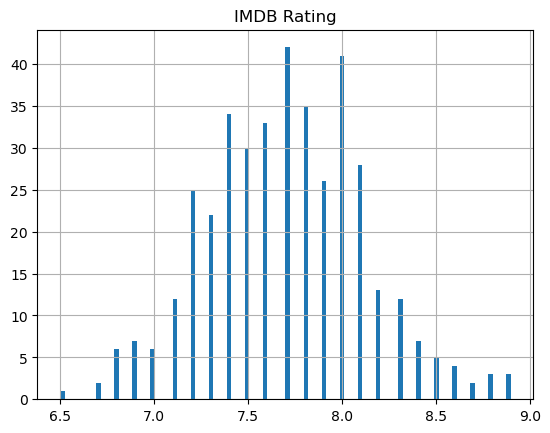

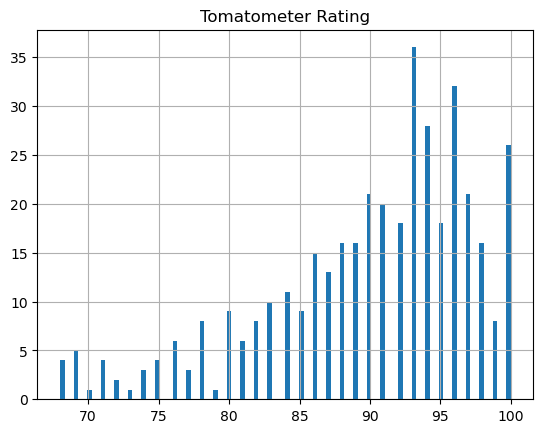

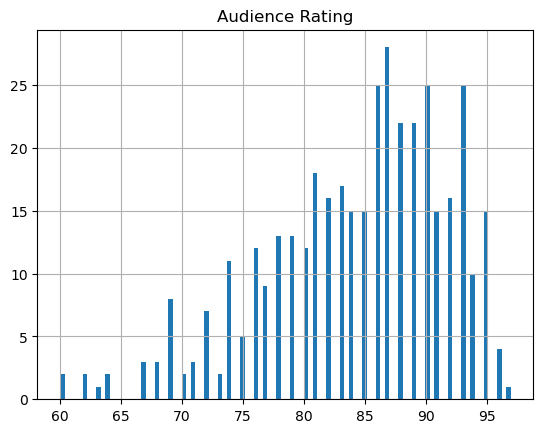

In [21]:
filtered_outlier = data_filter[['IMDB Rating','Tomatometer Rating','Audience Rating']]
for col in filtered_outlier:
    data_filter.hist(col, bins=100)

Вычисляем корреляцию данных:

In [22]:
temp_filtered = data_filter[['IMDB Rating','Tomatometer Count','Tomatometer Rating','Audience Rating','Audience Count','Tomatometer Count','Movie Time','Year of Release','Tomatometer Rotten Critics Count', 'Tomatometer Fresh Critics Count', 'Tomatometer Top Critics Count']]
temp_filtered.corr()

IMDB Rating  Tomatometer Count  \
IMDB Rating                          1.000000           0.218096   
Tomatometer Count                    0.218096           1.000000   
Tomatometer Rating                   0.269927           0.017001   
Audience Rating                      0.826508           0.058882   
Audience Count                       0.189373           0.063474   
Tomatometer Count                    0.218096           1.000000   
Movie Time                           0.265425           0.103521   
Year of Release                      0.133420           0.803818   
Tomatometer Rotten Critics Count     0.131680           0.691255   
Tomatometer Fresh Critics Count      0.219526           0.993500   
Tomatometer Top Critics Count        0.240517           0.944010   

                                  Tomatometer Rating  Audience Rating  \
IMDB Rating                                 0.269927         0.826508   
Tomatometer Count                           0.017001         0.058882   
Tomatometer Rating                          1.000000         0.311656   
Audience Rating                             0.311656         1.000000   
Audience Count                             -0.056422        -0.060644   
Tomatometer Count                           0.017001         0.058882   
Movie Time                                 -0.214463         0.147798   
Year of Release                            -0.125906         0.077361   
Tomatometer Rotten Critics Count           -0.461965        -0.015844   
Tomatometer Fresh Critics Count             0.091571         0.067387   
Tomatometer Top Critics Count               0.002540         0.093376   

                                  Audience Count  Tomatometer Count  \
IMDB Rating                             0.189373           0.218096   
Tomatometer Count                       0.063474           1.000000   
Tomatometer Rating                     -0.056422           0.017001   
Audience Rating                        -0.060644           0.058882   
Audience Count                          1.000000           0.063474   
Tomatometer Count                       0.063474           1.000000   
Movie Time                              0.204521           0.103521   
Year of Release                         0.090960           0.803818   
Tomatometer Rotten Critics Count        0.081283           0.691255   
Tomatometer Fresh Critics Count         0.057067           0.993500   
Tomatometer Top Critics Count           0.117132           0.944010   

                                  Movie Time  Year of Release  \
IMDB Rating                         0.265425         0.133420   
Tomatometer Count                   0.103521         0.803818   
Tomatometer Rating                 -0.214463        -0.125906   
Audience Rating                     0.147798         0.077361   
Audience Count                      0.204521         0.090960   
Tomatometer Count                   0.103521         0.803818   
Movie Time                          1.000000         0.189101   
Year of Release                     0.189101         1.000000   
Tomatometer Rotten Critics Count    0.186819         0.599257   
Tomatometer Fresh Critics Count     0.084606         0.791601   
Tomatometer Top Critics Count       0.126953         0.847723   

                                  Tomatometer Rotten Critics Count  \
IMDB Rating                                               0.131680   
Tomatometer Count                                         0.691255   
Tomatometer Rating                                       -0.461965   
Audience Rating                                          -0.015844   
Audience Count                                            0.081283   
Tomatometer Count                                         0.691255   
Movie Time                                                0.186819   
Year of Release                                           0.599257   
Tomatometer Rotten Critics Count                          1.000000   
Tomato

Заполним данные зная корреляцию:

In [23]:
data.describe()[['IMDB Rating','Audience Rating']]

IMDB Rating  Audience Rating
count   571.000000       439.000000
mean      7.570403        82.428246
std       0.559652        10.927897
min       5.600000        21.000000
25%       7.300000        78.000000
50%       7.600000        85.000000
75%       7.900000        90.000000
max       9.300000        98.000000

In [24]:

rate = lambda x: round(x*(82.4/7.5))
data['Audience Rating'] = data['Audience Rating'].fillna(data['IMDB Rating'].transform(rate))
data

Film Oscar Year  \
0                                                Wings    1927/28   
1                                           7th Heaven    1927/28   
2                                           The Racket    1927/28   
3                                  The Broadway Melody    1928/29   
4                                                Alibi    1928/29   
5                                      Hollywood Revue    1928/29   
6                                       In Old Arizona    1928/29   
7                                          The Patriot    1928/29   
8                       All Quiet on the Western Front    1929/30   
9                                        The Big House    1929/30   
10                                            Disraeli    1929/30   
11                                        The Divorcee    1929/30   
12                                     The Love Parade    1929/30   
13                                            Cimarron    1930/31   
14                                          East Lynne    1930/31   
15                                      The Front Page    1930/31   
16                                              Skippy    1930/31   
17                                         Trader Horn    1930/31   
18                                         Grand Hotel    1931/32   
19                                          Arrowsmith    1931/32   
20                                            Bad Girl    1931/32   
21                                           The Champ    1931/32   
22                                     Five Star Final    1931/32   
23                                   One Hour with You    1931/32   
24                                    Shanghai Express    1931/32   
25                              The Smiling Lieutenant    1931/32   
26                                           Cavalcade    1932/33   
27                                         42nd Street    1932/33   
28                                  A Farewell to Arms    1932/33   
29                   I Am a Fugitive from a Chain Gang    1932/33   
30                                      Lady for a Day    1932/33   
31                                        Little Women    1932/33   
32                      The Private Life of Henry VIII    1932/33   
33                                  She Done Him Wrong    1932/33   
34                                     Smilin' Through    1932/33   
35                                          State Fair    1932/33   
36                               It Happened One Night       1934   
37                      The Barretts of Wimpole Street       1934   
38                                           Cleopatra       1934   
39                                     Flirtation Walk       1934   
40                                    The Gay Divorcee       1934   
41                                 Here Comes the Navy       1934   
42                             The House of Rothschild       1934   
43                                   Imitation of Life       1934   
44                                   One Night of Love       1934   
45                                        The Thin Man       1934   
46                                         Viva Villa!       1934   
47                                    The White Parade       1934   
48                                Mutiny on the Bounty       1935   
49                                         Alice Adams       1935   
50                             Broadway Melody of 1936       1935   
51                                       Captain Blood       1935   
52                                   David Copperfield       1935   
53                                        The Informer       1935   
54                        The Lives of a Bengal Lancer       1935   
55                           A Midsummer Night's Dream       1935   
56                                      Les Misérables       1935   
57                                    Naughty Ma

In [25]:
data.describe()[['Year of Release','Tomatometer Count']]

Year of Release  Tomatometer Count
count       571.000000         439.000000
mean       1973.357268         110.697039
std          29.315738         119.541406
min        1927.000000           5.000000
25%        1944.000000          25.000000
50%        1972.000000          54.000000
75%        2001.000000         199.000000
max        2021.000000         574.000000

In [26]:

tomat_count = lambda x: round(x*(110.6/1973.3))
data['Tomatometer Count'] = data['Tomatometer Count'].fillna(data['Year of Release'].transform(tomat_count))
data

Film Oscar Year  \
0                                                Wings    1927/28   
1                                           7th Heaven    1927/28   
2                                           The Racket    1927/28   
3                                  The Broadway Melody    1928/29   
4                                                Alibi    1928/29   
5                                      Hollywood Revue    1928/29   
6                                       In Old Arizona    1928/29   
7                                          The Patriot    1928/29   
8                       All Quiet on the Western Front    1929/30   
9                                        The Big House    1929/30   
10                                            Disraeli    1929/30   
11                                        The Divorcee    1929/30   
12                                     The Love Parade    1929/30   
13                                            Cimarron    1930/31   
14                                          East Lynne    1930/31   
15                                      The Front Page    1930/31   
16                                              Skippy    1930/31   
17                                         Trader Horn    1930/31   
18                                         Grand Hotel    1931/32   
19                                          Arrowsmith    1931/32   
20                                            Bad Girl    1931/32   
21                                           The Champ    1931/32   
22                                     Five Star Final    1931/32   
23                                   One Hour with You    1931/32   
24                                    Shanghai Express    1931/32   
25                              The Smiling Lieutenant    1931/32   
26                                           Cavalcade    1932/33   
27                                         42nd Street    1932/33   
28                                  A Farewell to Arms    1932/33   
29                   I Am a Fugitive from a Chain Gang    1932/33   
30                                      Lady for a Day    1932/33   
31                                        Little Women    1932/33   
32                      The Private Life of Henry VIII    1932/33   
33                                  She Done Him Wrong    1932/33   
34                                     Smilin' Through    1932/33   
35                                          State Fair    1932/33   
36                               It Happened One Night       1934   
37                      The Barretts of Wimpole Street       1934   
38                                           Cleopatra       1934   
39                                     Flirtation Walk       1934   
40                                    The Gay Divorcee       1934   
41                                 Here Comes the Navy       1934   
42                             The House of Rothschild       1934   
43                                   Imitation of Life       1934   
44                                   One Night of Love       1934   
45                                        The Thin Man       1934   
46                                         Viva Villa!       1934   
47                                    The White Parade       1934   
48                                Mutiny on the Bounty       1935   
49                                         Alice Adams       1935   
50                             Broadway Melody of 1936       1935   
51                                       Captain Blood       1935   
52                                   David Copperfield       1935   
53                                        The Informer       1935   
54                        The Lives of a Bengal Lancer       1935   
55                           A Midsummer Night's Dream       1935   
56                                      Les Misérables       1935   
57                                    Naughty Ma

In [27]:
data_filter.describe()[['Tomatometer Count','Tomatometer Rotten Critics Count','Tomatometer Top Critics Count','Tomatometer Fresh Critics Count']]

Tomatometer Count  Tomatometer Rotten Critics Count  \
count         399.000000                        399.000000   
mean          116.511278                         11.651629   
std           120.737700                         17.251799   
min             5.000000                          0.000000   
25%            30.000000                          2.000000   
50%            59.000000                          5.000000   
75%           205.500000                         15.500000   
max           574.000000                        182.000000   

       Tomatometer Top Critics Count  Tomatometer Fresh Critics Count  
count                     399.000000                       399.000000  
mean                       23.030075                       104.912281  
std                        21.921264                       109.601608  
min                         0.000000                         4.000000  
25%                         5.000000                        26.000000  
50%                        13.000000                        54.000000  
75%                        48.000000                       176.500000  
max                        69.000000                       495.000000

In [28]:
tomat_rotten = lambda x: round(x*(11.6/116.5))
data['Tomatometer Rotten Critics Count'] = data['Tomatometer Rotten Critics Count'].fillna(data['Tomatometer Count'].transform(tomat_rotten))

tomat_top = lambda x: round(x*(23/116.5))
data['Tomatometer Top Critics Count'] = data['Tomatometer Top Critics Count'].fillna(data['Tomatometer Count'].transform(tomat_top))

tomat_fresh = lambda x: round(x*(104.9/116.5))
data['Tomatometer Fresh Critics Count'] = data['Tomatometer Fresh Critics Count'].fillna(data['Tomatometer Count'].transform(tomat_fresh))
data.head(5)

Film Oscar Year Film Studio/Producer(s)    Award  \
0                Wings    1927/28    Famous Players-Lasky   Winner   
1           7th Heaven    1927/28                     Fox  Nominee   
2           The Racket    1927/28       The Caddo Company  Nominee   
3  The Broadway Melody    1928/29     Metro-Goldwyn-Mayer   Winner   
4                Alibi    1928/29     Feature Productions  Nominee   

   Year of Release  Movie Time            Movie Genre  IMDB Rating  \
0             1927         144      Drama,Romance,War          7.5   
1             1927         110          Drama,Romance          7.7   
2             1928          84  Crime,Drama,Film-Noir          6.7   
3             1929         100  Drama,Musical,Romance          5.7   
4             1929          91   Action,Crime,Romance          5.8   

   IMDB Votes                                         Movie Info  \
0       12221  With World War I afoot, David Armstrong (Richa...   
1        3439                                            unknown   
2        1257                                            unknown   
3        6890  Vaudeville sisters "Hank" (Bessie Love) and Qu...   
4         765                                            unknown   

                               Genres  \
0        Action & Adventure, Classics   
1                             unknown   
2                             unknown   
3  Musical & Performing Arts, Romance   
4                             unknown   

                                    Critic Consensus Content Rating  \
0  Subsequent war epics may have borrowed heavily...          PG-13   
1                                            unknown             NR   
2                                            unknown             NR   
3  The Broadway Melody is interesting as an examp...             NR   
4                                            unknown             NR   

         Directors                                        Authors  \
0  William Wellman                  Hope Loring, Louis D. Lighton   
1      Frank Lloyd                              Reginald Berkeley   
2          unknown                                        unknown   
3   Harry Beaumont  James Gleason, Norman Houston, Sarah Y. Mason   
4          unknown                                        unknown   

                                              Actors Original Release Date  \
0  Clara Bow, Charles 'Buddy' Rogers, Richard Arl...            1927-08-12   
1                                            unknown            1927-01-01   
2                                            unknown            1928-01-01   
3  Anita Page, Bessie Love, Charles King, Jed Pro...            1929-02-01   
4                                            unknown            1929-01-01   

  Streaming Release Date                 Production Company  \
0             2017-01-02                            Unknown   
1             2007-01-01  20th Century Fox Film Corporation   
2             2007-01-01                                Fox   
3             2017-02-25             MGM Home Entertainment   
4             2007-01-01                                Fox   

  Tomatometer Status  Tomatometer Rating  Tomatometer Count Audience Status  \
0    Certified-Fresh                93.0               46.0         Upright   
1    Certified-Fresh                 NaN              108.0         Spilled   
2    Certified-Fresh                 NaN              108.0         Upright   
3             Rotten                33.0               24.0         Spilled   
4    Certified-Fresh                 NaN              108.0         Upright   

   Audience Rating  Audience Count  Tomatometer Top Critics Count  \
0             78.0          3530.0                            9.0   
1             85.0             NaN                           21.0   
2             74.0             NaN                           21.0   
3             21.0          1813.0                            7.0   
4         

То,что не смогли найти заполним нулями:

In [29]:
data['Audience Count'] = data['Audience Count'].fillna(0)
data['Tomatometer Rating'] = data['Tomatometer Rating'].fillna(0)
data

Film Oscar Year  \
0                                                Wings    1927/28   
1                                           7th Heaven    1927/28   
2                                           The Racket    1927/28   
3                                  The Broadway Melody    1928/29   
4                                                Alibi    1928/29   
5                                      Hollywood Revue    1928/29   
6                                       In Old Arizona    1928/29   
7                                          The Patriot    1928/29   
8                       All Quiet on the Western Front    1929/30   
9                                        The Big House    1929/30   
10                                            Disraeli    1929/30   
11                                        The Divorcee    1929/30   
12                                     The Love Parade    1929/30   
13                                            Cimarron    1930/31   
14                                          East Lynne    1930/31   
15                                      The Front Page    1930/31   
16                                              Skippy    1930/31   
17                                         Trader Horn    1930/31   
18                                         Grand Hotel    1931/32   
19                                          Arrowsmith    1931/32   
20                                            Bad Girl    1931/32   
21                                           The Champ    1931/32   
22                                     Five Star Final    1931/32   
23                                   One Hour with You    1931/32   
24                                    Shanghai Express    1931/32   
25                              The Smiling Lieutenant    1931/32   
26                                           Cavalcade    1932/33   
27                                         42nd Street    1932/33   
28                                  A Farewell to Arms    1932/33   
29                   I Am a Fugitive from a Chain Gang    1932/33   
30                                      Lady for a Day    1932/33   
31                                        Little Women    1932/33   
32                      The Private Life of Henry VIII    1932/33   
33                                  She Done Him Wrong    1932/33   
34                                     Smilin' Through    1932/33   
35                                          State Fair    1932/33   
36                               It Happened One Night       1934   
37                      The Barretts of Wimpole Street       1934   
38                                           Cleopatra       1934   
39                                     Flirtation Walk       1934   
40                                    The Gay Divorcee       1934   
41                                 Here Comes the Navy       1934   
42                             The House of Rothschild       1934   
43                                   Imitation of Life       1934   
44                                   One Night of Love       1934   
45                                        The Thin Man       1934   
46                                         Viva Villa!       1934   
47                                    The White Parade       1934   
48                                Mutiny on the Bounty       1935   
49                                         Alice Adams       1935   
50                             Broadway Melody of 1936       1935   
51                                       Captain Blood       1935   
52                                   David Copperfield       1935   
53                                        The Informer       1935   
54                        The Lives of a Bengal Lancer       1935   
55                           A Midsummer Night's Dream       1935   
56                                      Les Misérables       1935   
57                                    Naughty Ma

In [30]:
data.isna().sum()

Film                                0
Oscar Year                          0
Film Studio/Producer(s)             0
Award                               0
Year of Release                     0
Movie Time                          0
Movie Genre                         0
IMDB Rating                         0
IMDB Votes                          0
Movie Info                          0
Genres                              0
Critic Consensus                    0
Content Rating                      0
Directors                           0
Authors                             0
Actors                              0
Original Release Date               0
Streaming Release Date              0
Production Company                  0
Tomatometer Status                  0
Tomatometer Rating                  0
Tomatometer Count                   0
Audience Status                     0
Audience Rating                     0
Audience Count                      0
Tomatometer Top Critics Count       0
Tomatometer 

## Коррекция типов данных

Изменим на числовые значения:

In [31]:
data['Movie Time'] = data['Movie Time'] .astype(int)
data['IMDB Votes'] = data['IMDB Votes'].astype(float)
data['Tomatometer Rating'] = data['Tomatometer Rating'].astype(int)
data['Tomatometer Count'] = data['Tomatometer Count'].astype(int)
data['Audience Rating'] = data['Audience Rating'].astype(int)
data['Audience Count'] = data['Audience Rating'].astype(int)
data['Tomatometer Fresh Critics Count'] = data['Tomatometer Fresh Critics Count'].astype(int)
data['Tomatometer Rotten Critics Count'] = data['Tomatometer Rotten Critics Count'].astype(int)


## Обогащение данных

Время между официальным релизом и стриминговым:

In [32]:
data["Streaming Pause"]=data["Streaming Release Date"]-data['Original Release Date']

## Изучение основных параметров без выбросов

[[<Axes: title={'center': 'IMDB Rating'}>]]
[[<Axes: title={'center': 'IMDB Rating'}>]]


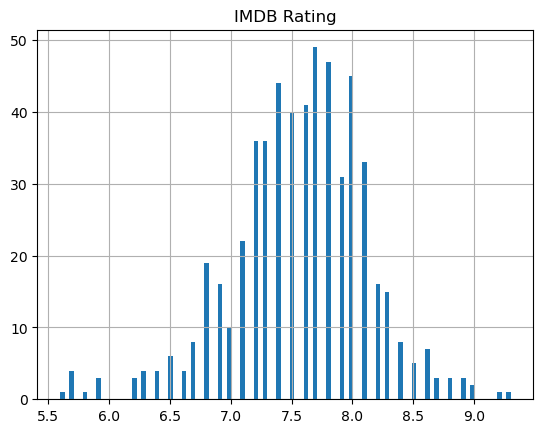

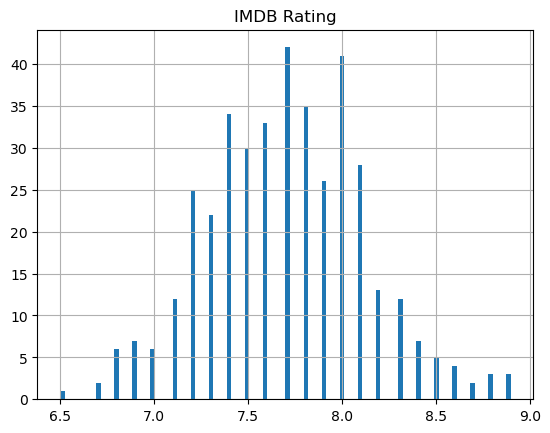

In [33]:
print (data.hist('IMDB Rating', bins=100))
print (data_filter.hist('IMDB Rating', bins=100))

[[<Axes: title={'center': 'Tomatometer Rating'}>]]
[[<Axes: title={'center': 'Tomatometer Rating'}>]]


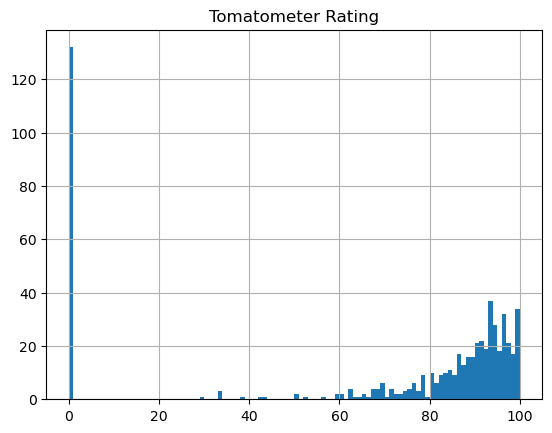

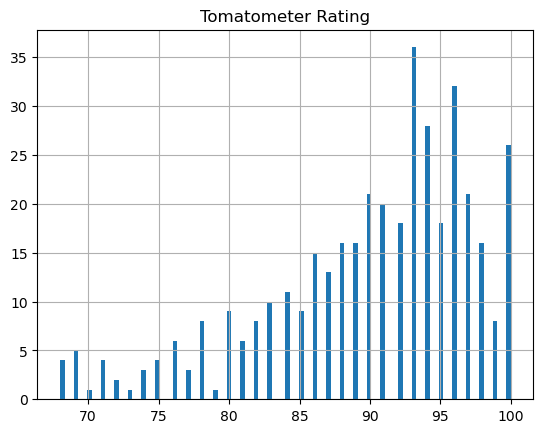

In [34]:
print (data.hist('Tomatometer Rating', bins=100))
print (data_filter.hist('Tomatometer Rating', bins=100))

[[<Axes: title={'center': 'Audience Rating'}>]]
[[<Axes: title={'center': 'Audience Rating'}>]]


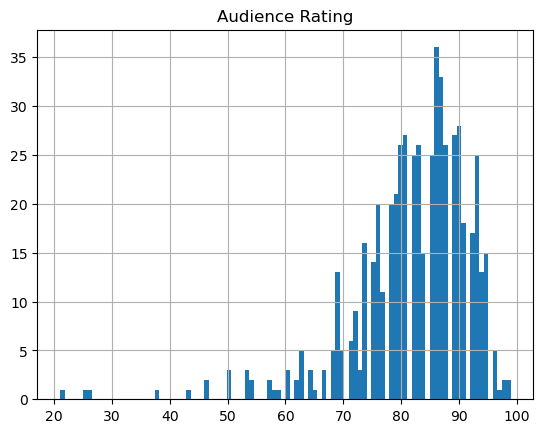

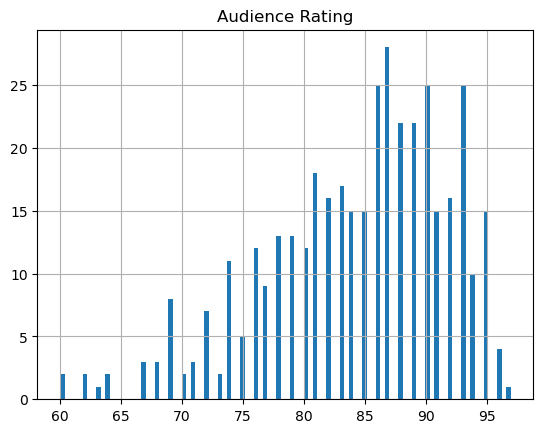

In [35]:
print (data.hist('Audience Rating', bins=100))
print (data_filter.hist('Audience Rating', bins=100))

## Длительность фильмов :

In [36]:
print(data_filter['Movie Time'].mean())
print(data_filter['Movie Time'].median())

126.30827067669173
122.0


In [37]:
data_filter['Movie Time'].describe()

count    399.000000
mean     126.308271
std       25.351850
min       84.000000
25%      109.000000
50%      122.000000
75%      138.000000
max      228.000000
Name: Movie Time, dtype: float64

array([[<Axes: title={'center': 'Movie Time'}>]], dtype=object)

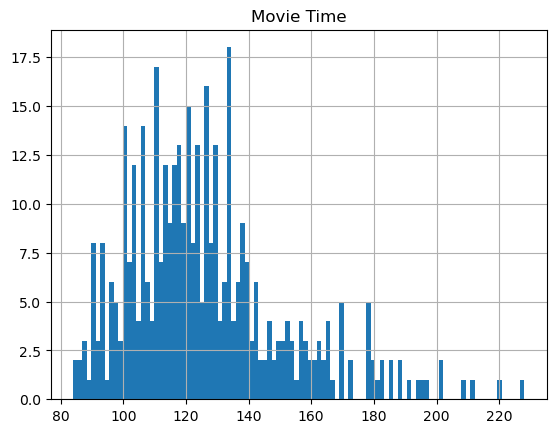

In [38]:
data_filter.hist('Movie Time', bins=100)

## Зависимость рейтинга от длительности

In [39]:
duration = data_filter.pivot_table(index='IMDB Rating', values='Movie Time', aggfunc='mean')
dutration = duration.sort_values(ascending=False, by ='Movie Time' )
duration = duration.reset_index()
duration

IMDB Rating  Movie Time
0           6.5  106.000000
1           6.7  123.500000
2           6.8  117.666667
3           6.9  118.571429
4           7.0  122.833333
5           7.1  116.333333
6           7.2  121.560000
7           7.3  113.045455
8           7.4  121.764706
9           7.5  127.066667
10          7.6  127.454545
11          7.7  120.904762
12          7.8  130.600000
13          7.9  123.153846
14          8.0  128.195122
15          8.1  130.964286
16          8.2  131.307692
17          8.3  142.500000
18          8.4  128.571429
19          8.5  132.800000
20          8.6  151.500000
21          8.7  156.000000
22          8.8  156.000000
23          8.9  183.333333

<Axes: xlabel='IMDB Rating'>

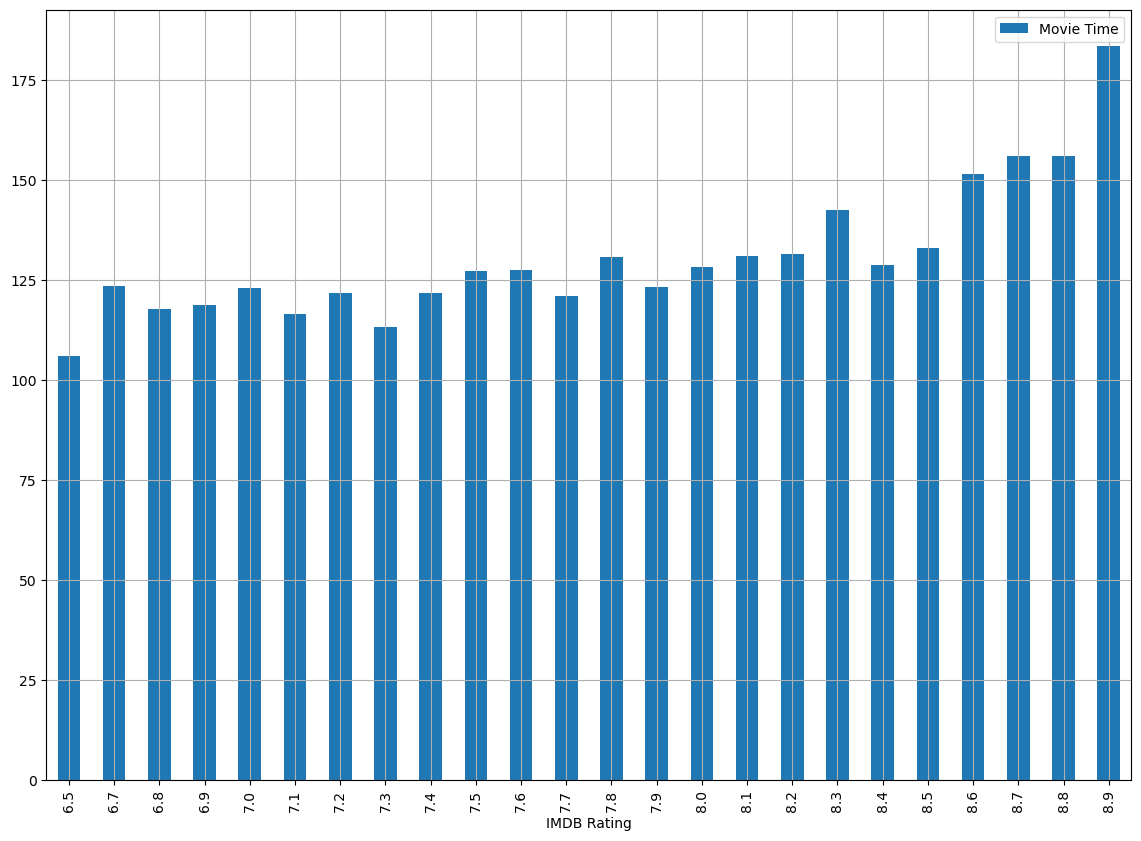

In [40]:
duration.plot(grid=True, figsize=(14, 10), kind = 'bar', x='IMDB Rating', y='Movie Time')

## Победитель Оскара относительно оценок:

In [41]:
won = data_filter.query('Award == "Winner"')

Text(0.5, 1.0, 'Победители оскара')

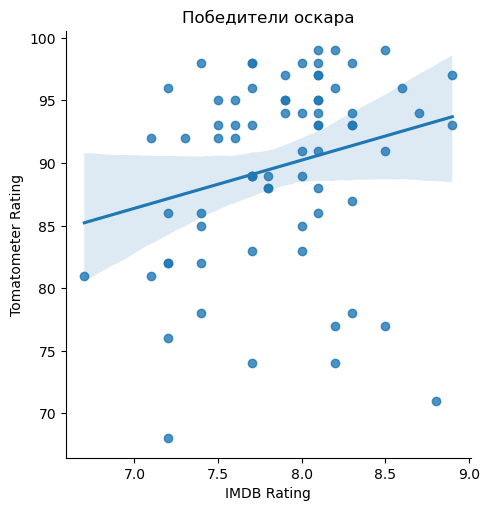

In [42]:
sns.lmplot(x="IMDB Rating", y="Tomatometer Rating", data = won)
plt.title('Победители оскара')


## Драмы и Комедии относительно оценок рейтинга:

Text(0.5, 1.0, 'Drama')

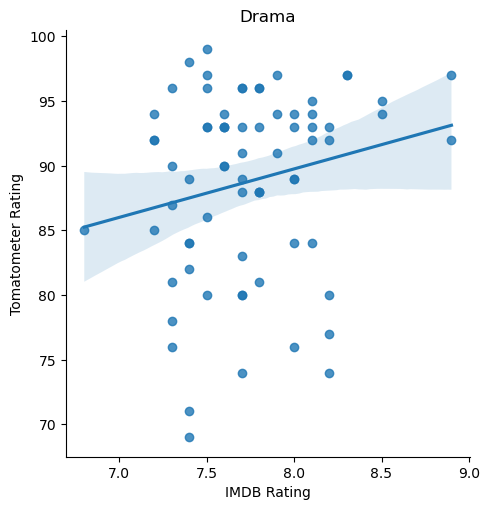

In [43]:
romantic = data_filter.query('Genres == "Drama"')
sns.lmplot(x="IMDB Rating", y="Tomatometer Rating", data=romantic)
plt.title('Drama')


Text(0.5, 1.0, 'Genres')

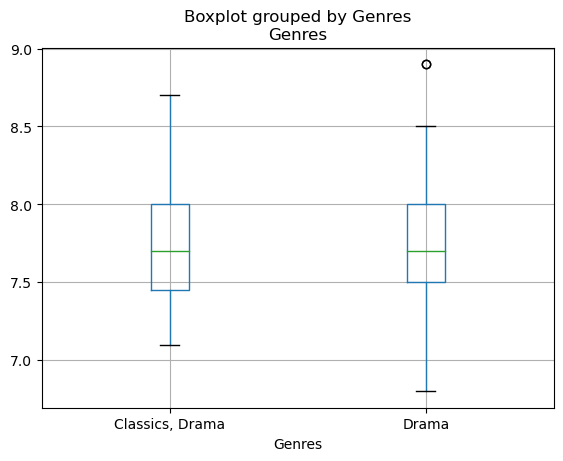

In [44]:
filter_romantic= data_filter.query('Genres == ["Drama","Classics, Drama" ]')
filter_romantic.boxplot(by ='Genres', column ='IMDB Rating', grid = True)
plt.title('Genres')

<Axes: title={'center': 'IMDB Rating'}, xlabel='Tomatometer Status'>

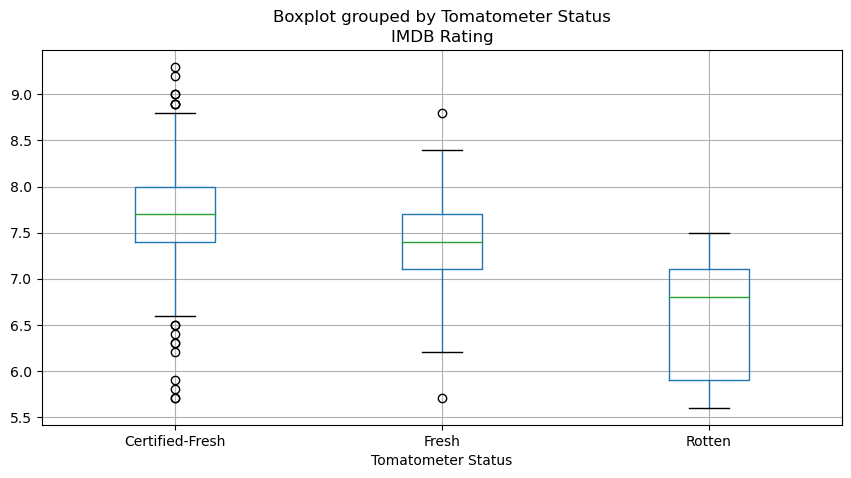

In [46]:
data.boxplot(by ='Tomatometer Status', column ='IMDB Rating',figsize=(10,5), grid = True)